In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['font.size'] = 18
BUCKET_SIZE = 3

In [4]:
train_data = pd.read_csv('../data/labeled_csv/val/sorted_train.csv')
print(train_data.shape)
print(train_data.head())

(20399, 4)
                     prev_img                    curr_img  category      speed
0  data/images/train/img0.jpg  data/images/train/img1.jpg         9  28.105569
1  data/images/train/img1.jpg  data/images/train/img2.jpg         9  28.105569
2  data/images/train/img2.jpg  data/images/train/img3.jpg         9  28.106527
3  data/images/train/img3.jpg  data/images/train/img4.jpg         9  28.130404
4  data/images/train/img4.jpg  data/images/train/img5.jpg         9  28.109243


In [5]:
y_pred = pd.read_csv('../data/prediction.txt')
print(y_pred.shape)
print(y_pred.head())

(20416, 10)
          0         1         2         3         4         5         6  \
0  0.000001  0.000001  0.000009  0.000114  0.000421  0.000134  0.126008   
1  0.000002  0.000002  0.000014  0.000196  0.000779  0.000217  0.146346   
2  0.000003  0.000002  0.000018  0.000290  0.001052  0.000375  0.216042   
3  0.000014  0.000012  0.000073  0.001049  0.003811  0.001289  0.242432   
4  0.000006  0.000005  0.000035  0.000547  0.001802  0.000976  0.322337   

          7         8         9  
0  0.325577  0.524842  0.022893  
1  0.359564  0.462814  0.030065  
2  0.396381  0.349657  0.036180  
3  0.346444  0.337596  0.067282  
4  0.351162  0.266930  0.056198  


In [26]:
train_data['pred_category'] = np.argmax(a=y_pred.values, axis=-1)[:train_data.shape[0]]
train_data['pred_speed'] = (train_data['pred_category'] + 0.5) * BUCKET_SIZE

In [27]:
train_data.head()

,prev_img,curr_img,category,speed,pred_category,pred_speed
0,data/images/train/img0.jpg,data/images/train/img1.jpg,9,28.105569,8,25.5
1,data/images/train/img1.jpg,data/images/train/img2.jpg,9,28.105569,8,25.5
2,data/images/train/img2.jpg,data/images/train/img3.jpg,9,28.106527,7,22.5
3,data/images/train/img3.jpg,data/images/train/img4.jpg,9,28.130404,7,22.5
4,data/images/train/img4.jpg,data/images/train/img5.jpg,9,28.109243,7,22.5


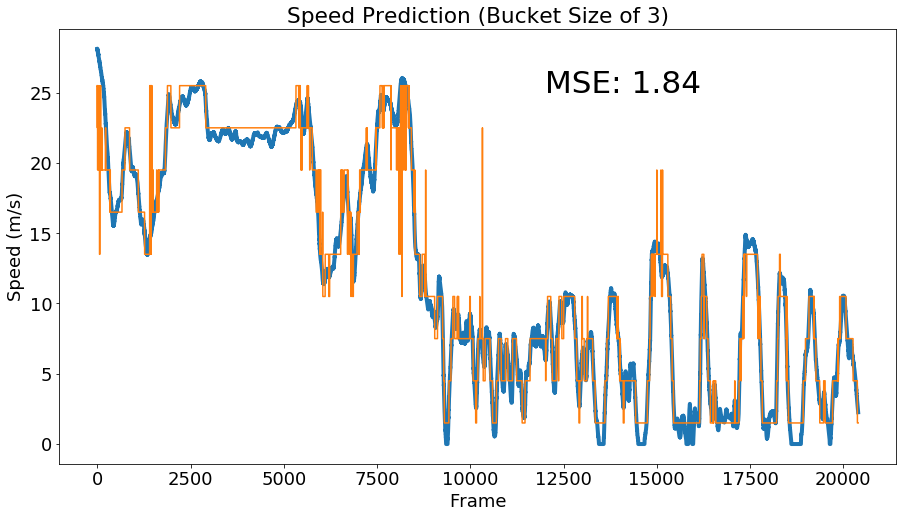

In [87]:
plt.plot(train_data['speed'], linewidth=4)
plt.plot(train_data['pred_speed'])
plt.xlabel('Frame')
plt.ylabel('Speed (m/s)')
plt.title('Speed Prediction (Bucket Size of 3)')

mse = np.mean(np.square(train_data['speed'] - train_data['pred_speed']))
plt.annotate(f'MSE: {mse:.2f}', xy=(12000, 25), fontsize='xx-large')
plt.show()

In [68]:
y_pred = pd.read_csv('../data/prediction_1.txt')
y_pred = np.argmax(a=y_pred.values, axis=-1)[:train_data.shape[0]]
y_pred_speed = (y_pred + 0.5) * BUCKET_SIZE

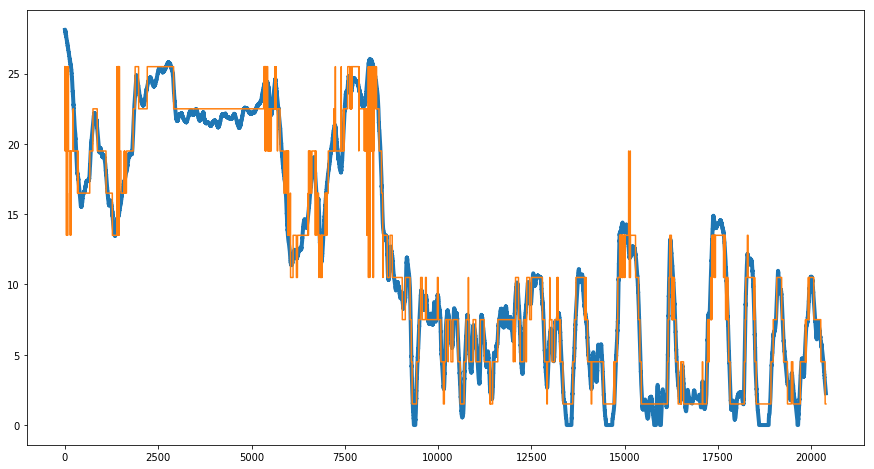

In [69]:
plt.plot(train_data['speed'], linewidth=4)
plt.plot(y_pred_speed)
plt.show()

In [71]:
print(np.mean(np.square(y_pred_speed - train_data['speed'])))



2.313869259110794
